In [ ]:
!pip install torchviz

In [1]:
import sys
sys.path.append("..")

from dataset.CustomDataset import CustomDataset
#import train
import train
from datetime import datetime
from torch import nn
from architectures.SimpleConvNet import SimpleConvNet, SimpleConvNetDataset
import torch
from torchviz import make_dot

In [2]:
training_set = CustomDataset('./data/mnist/', train=True, nb=100)

In [3]:
training_set.input.shape

torch.Size([100, 2, 14, 14])

In [4]:
len(training_set)

100

---

In [5]:
%load_ext tensorboard
%tensorboard --logdir ./logs

config_model_no_WS = dict(
    logs_dir=f'./logs/no_ws/{datetime.now().strftime("%Y%m%d_%H%M%S")}',
    dataset=SimpleConvNetDataset,
    criterion=nn.CrossEntropyLoss(),
    optimizer=torch.optim.Adam,
    learning_rate=0.001,
    batch_size=128,
    num_epochs=50,  # 250
    model=SimpleConvNet(class_num=10, channels_in=1), #'simple_conv',
    augmentation=False,
    verbose=1
)

model, history = train.train(config_model_no_WS)

Reusing TensorBoard on port 6006 (pid 10135), started 1:22:59 ago. (Use '!kill 10135' to kill it.)

epoch [001] loss_train: 2.14e+00 loss_test: 1.87e+00 acc_train: 5.75e-01 acc_test: 5.91e-01
epoch [002] loss_train: 1.75e+00 loss_test: 1.73e+00 acc_train: 6.76e-01 acc_test: 6.98e-01
epoch [003] loss_train: 1.64e+00 loss_test: 1.63e+00 acc_train: 7.00e-01 acc_test: 7.24e-01
epoch [004] loss_train: 1.57e+00 loss_test: 1.58e+00 acc_train: 7.12e-01 acc_test: 7.05e-01
epoch [005] loss_train: 1.50e+00 loss_test: 1.50e+00 acc_train: 6.90e-01 acc_test: 7.25e-01
epoch [006] loss_train: 1.47e+00 loss_test: 1.48e+00 acc_train: 7.04e-01 acc_test: 7.15e-01
epoch [007] loss_train: 1.44e+00 loss_test: 1.49e+00 acc_train: 7.25e-01 acc_test: 6.96e-01
epoch [008] loss_train: 1.41e+00 loss_test: 1.42e+00 acc_train: 7.28e-01 acc_test: 7.05e-01
epoch [009] loss_train: 1.37e+00 loss_test: 1.41e+00 acc_train: 7.31e-01 acc_test: 7.13e-01
epoch [010] loss_train: 1.35e+00 loss_test: 1.38e+00 acc_train: 7.37e-01 acc_test: 7.16e-01
epoch [011] loss_train: 1.32e+00 loss_test: 1.37e+00 acc_train: 7.25e-01 acc_tes

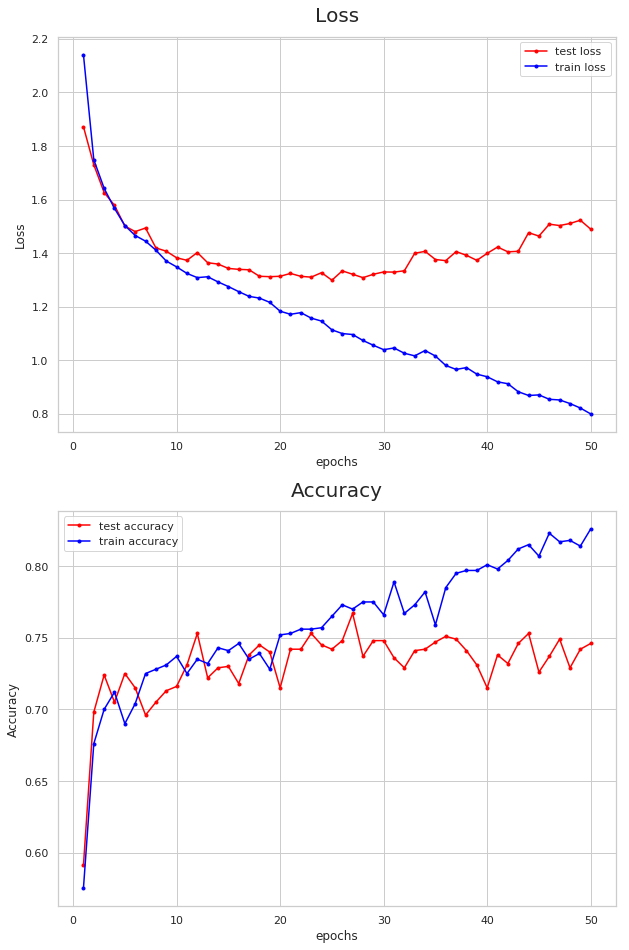

In [6]:
history.plot()

In [7]:
from train import get_dataset

config = dict(batch_size=128, dataset=SimpleConvNetDataset, augmentation=False)
training_loader, test_loader = get_dataset(config)
for i, j, k in training_loader:
    break

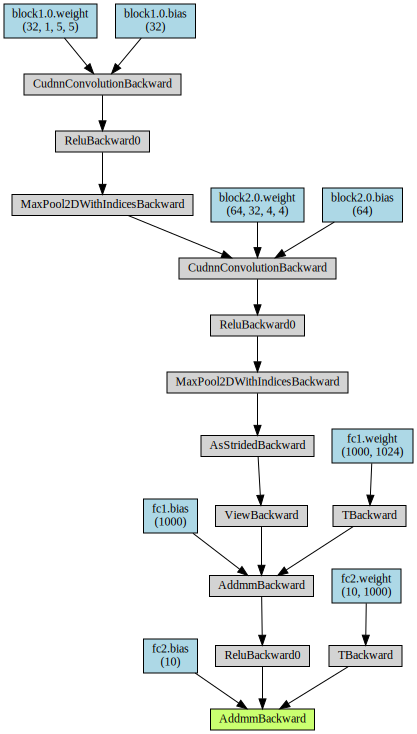

In [9]:
make_dot(model(i[:, 0, :, :].view(-1, 1, i.size(2), i.size(3)).to('cuda')), params=dict(model.named_parameters()))

---

In [11]:
from architectures.Linear import LinearDataset, Linear


In [12]:
%load_ext tensorboard
%tensorboard --logdir ./logs

config_linear = dict(
    logs_dir=f'./logs/no_ws/{datetime.now().strftime("%Y%m%d_%H%M%S")}',
    dataset=LinearDataset,
    criterion=nn.MSELoss(),
    optimizer=torch.optim.Adam,
    learning_rate=0.001,
    batch_size=128,
    num_epochs=50,  # 250
    model=Linear(), #'simple_conv',
    augmentation=False,
    verbose=1
)

model, history = train.train(config_linear)

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 10135), started 1:16:24 ago. (Use '!kill 10135' to kill it.)

epoch [001] loss_train: 3.02e-01 loss_test: 2.82e-01 acc_train: 6.60e+01 acc_test: 6.67e+01
epoch [002] loss_train: 2.70e-01 loss_test: 2.69e-01 acc_train: 6.39e+01 acc_test: 6.17e+01
epoch [003] loss_train: 2.66e-01 loss_test: 2.67e-01 acc_train: 6.53e+01 acc_test: 6.69e+01
epoch [004] loss_train: 2.66e-01 loss_test: 2.60e-01 acc_train: 6.22e+01 acc_test: 6.35e+01
epoch [005] loss_train: 2.63e-01 loss_test: 2.58e-01 acc_train: 6.60e+01 acc_test: 6.60e+01
epoch [006] loss_train: 2.61e-01 loss_test: 2.56e-01 acc_train: 6.17e+01 acc_test: 6.57e+01
epoch [007] loss_train: 2.57e-01 loss_test: 2.55e-01 acc_train: 6.73e+01 acc_test: 6.55e+01
epoch [008] loss_train: 2.58e-01 loss_test: 2.55e-01 acc_train: 6.22e+01 acc_test: 6.67e+01
epoch [009] loss_train: 2.59e-01 loss_test: 2.55e-01 acc_train: 6.76e+01 acc_test: 6.38e+01
epoch [010] loss_train: 2.57e-01 loss_test: 2.55e-01 acc_train: 6.20e+01 acc_test: 6.75e+01
epoch [011] loss_train: 2.54e-01 loss_test: 2.53e-01 acc_train: 6.75e+01 acc_tes

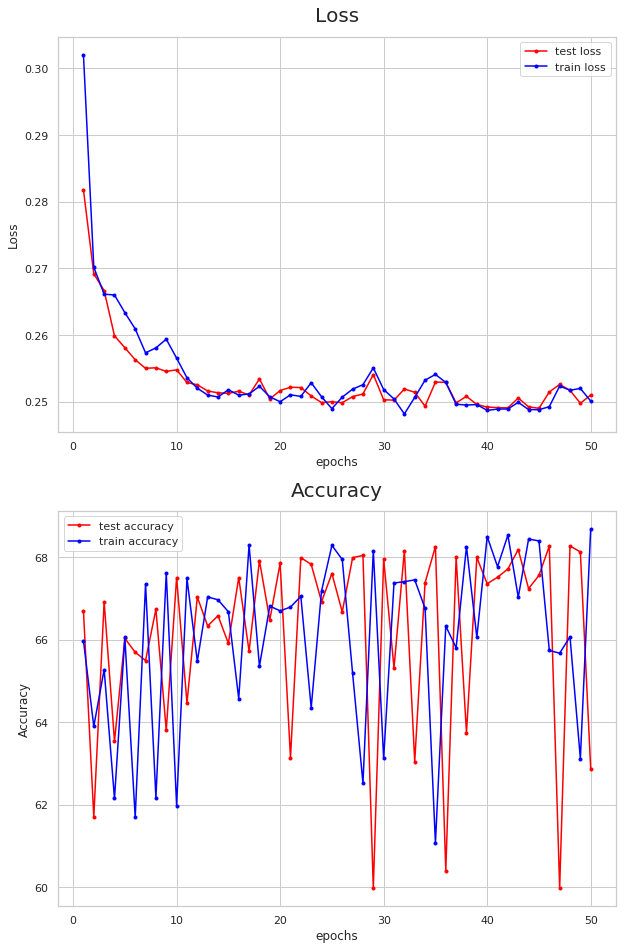

In [13]:
history.plot()

In [21]:
from train import get_dataset

config = dict(batch_size=128, dataset=CustomDataset, augmentation=False)
training_loader, test_loader = get_dataset(config)
for i, j, k in training_loader:
    break

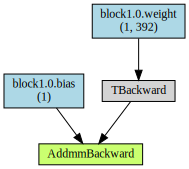

In [22]:
make_dot(model(i.to('cuda')), params=dict(model.named_parameters()))